In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/indian-crimes-dataset/crime_dataset_india.csv


In [2]:
df = pd.read_csv("/kaggle/input/indian-crimes-dataset/crime_dataset_india.csv")
df.head()

,Report Number,Date Reported,Date of Occurrence,Time of Occurrence,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed,Date Case Closed
0,1,02-01-2020 00:00,01-01-2020 00:00,01-01-2020 01:11,Ahmedabad,576,IDENTITY THEFT,16,M,Blunt Object,Violent Crime,13,No,NaN
1,2,01-01-2020 19:00,01-01-2020 01:00,01-01-2020 06:26,Chennai,128,HOMICIDE,37,M,Poison,Other Crime,9,No,NaN
2,3,02-01-2020 05:00,01-01-2020 02:00,01-01-2020 14:30,Ludhiana,271,KIDNAPPING,48,F,Blunt Object,Other Crime,15,No,NaN
3,4,01-01-2020 05:00,01-01-2020 03:00,01-01-2020 14:46,Pune,170,BURGLARY,49,F,Firearm,Other Crime,1,Yes,29-04-2020 05:00
4,5,01-01-2020 21:00,01-01-2020 04:00,01-01-2020 16:51,Pune,421,VANDALISM,30,F,Other,Other Crime,18,Yes,08-01-2020 21:00


In [3]:
df.isnull().sum()

Report Number             0
Date Reported             0
Date of Occurrence        0
Time of Occurrence        0
City                      0
Crime Code                0
Crime Description         0
Victim Age                0
Victim Gender             0
Weapon Used            5790
Crime Domain              0
Police Deployed           0
Case Closed               0
Date Case Closed      20098
dtype: int64

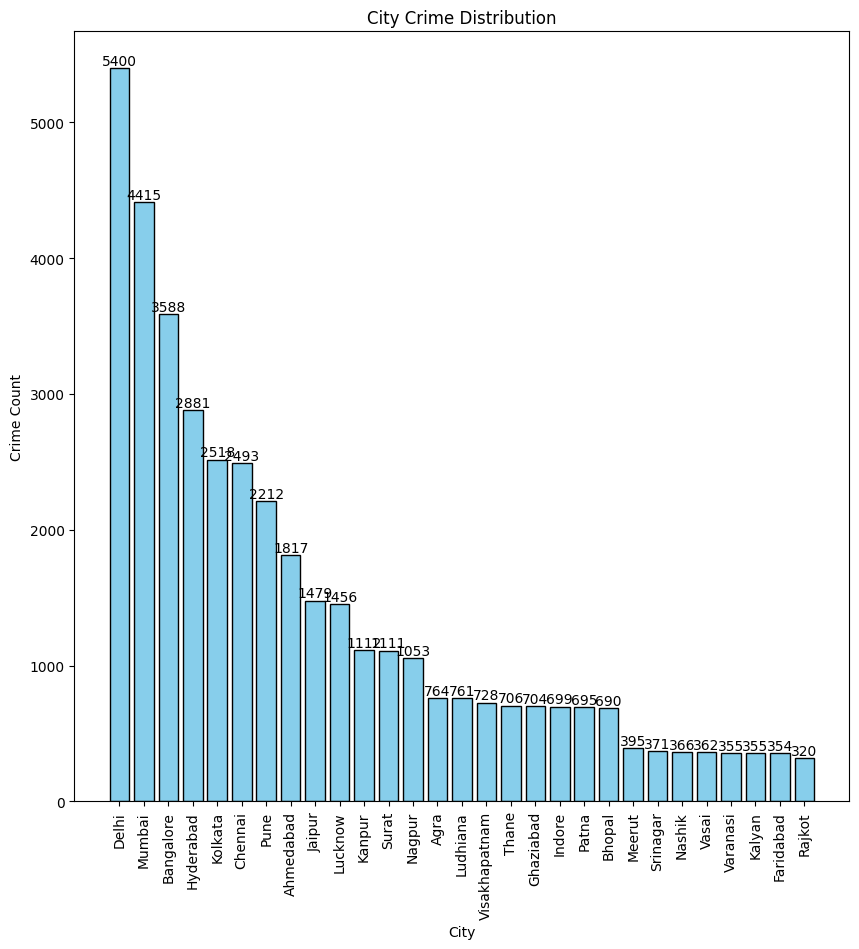

In [4]:
City_counts = df['City'].value_counts()
plt.figure(figsize=(10, 10))
plt.title('City Crime Distribution')
plt.xlabel('City')
plt.ylabel('Crime Count')
plt.bar(City_counts.index, City_counts.values, color='skyblue', edgecolor='black')
plt.xticks(rotation=90)
# Optionally, add counts on top of each bar
for index, value in enumerate(City_counts.values):
    plt.text(index, value + 0.2, str(value), ha='center', va='bottom')


* Delhi,Mumbai,Banglore,Hyderabad,kolkata are the top 5 cities with highest crime rates

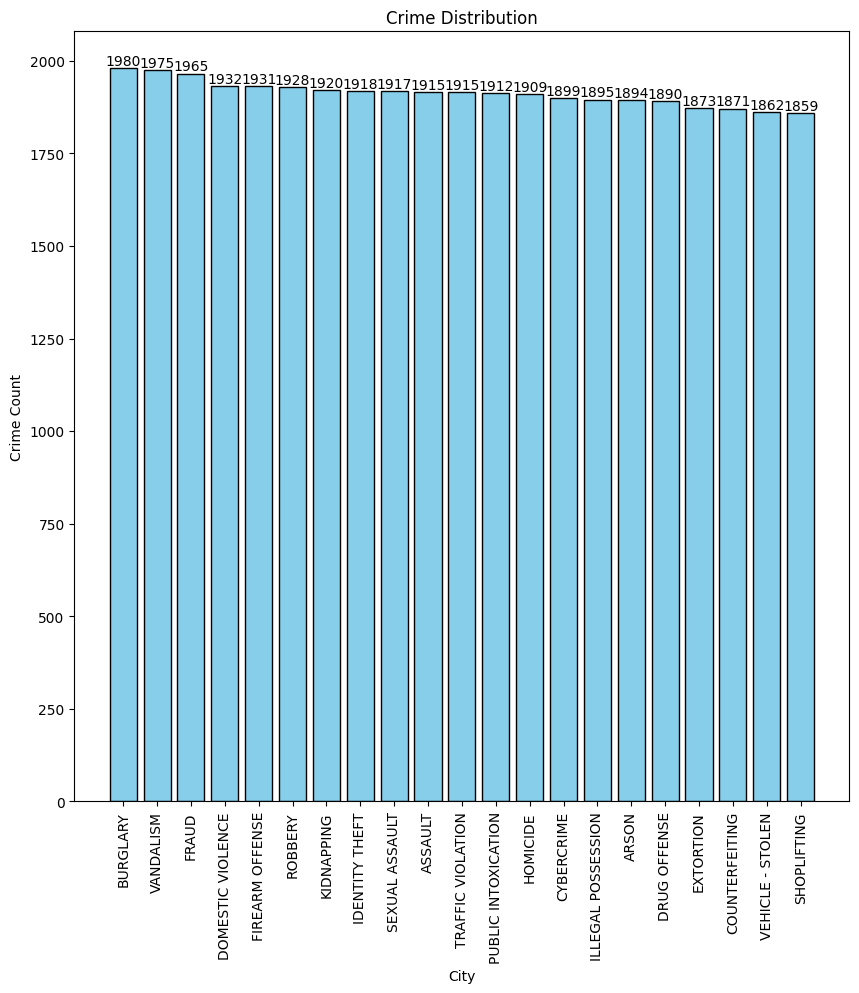

In [5]:
Crime_des_counts = df['Crime Description'].value_counts()
plt.figure(figsize=(10, 10))
plt.title('Crime Distribution')
plt.xlabel('City')
plt.ylabel('Crime Count')
plt.bar(Crime_des_counts.index, Crime_des_counts.values, color='skyblue', edgecolor='black')
plt.xticks(rotation=90)
# Optionally, add counts on top of each bar
for index, value in enumerate(Crime_des_counts.values):
    plt.text(index, value + 0.2, str(value), ha='center', va='bottom')

* Buglary,Vandalism,fraud,domestic violence,firearm offense are the top 5 crimes

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Victim Age', ylabel='Count'>

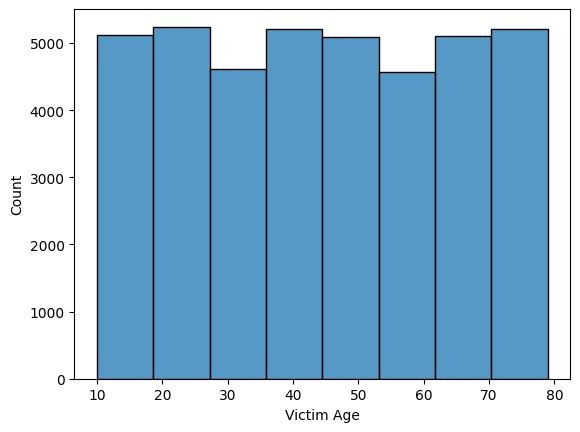

In [6]:
sns.histplot(data=df,x='Victim Age',bins=8)

Victim Gender
F    22423
M    13405
X     4332
Name: count, dtype: int64


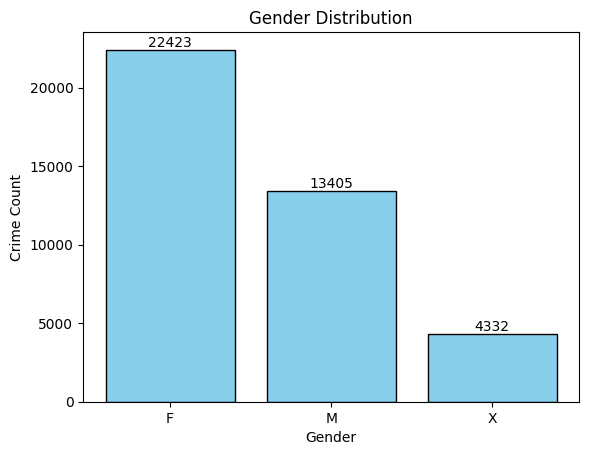

In [7]:
Crime_gen_counts = df['Victim Gender'].value_counts()
print(Crime_gen_counts)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Crime Count')
plt.bar(Crime_gen_counts.index, Crime_gen_counts.values, color='skyblue', edgecolor='black')
# Optionally, add counts on top of each bar
for index, value in enumerate(Crime_gen_counts.values):
    plt.text(index, value + 0.2, str(value), ha='center', va='bottom')



([<matplotlib.patches.Wedge at 0x7c583b84e350>,
 [Text(-1.0815751778545, -0.20048724310790136, 'F'),
  Text(1.0867117317592103, -0.1704629345544017, 'M'),
  Text(0.36567301628335863, 1.0374407188664954, 'X')],
 [Text(-0.5899500970115454, -0.10935667805885528, '55.8%'),
  Text(0.5927518536868419, -0.09297978248421909, '33.4%'),
  Text(0.19945800888183196, 0.5658767557453611, '10.8%')])

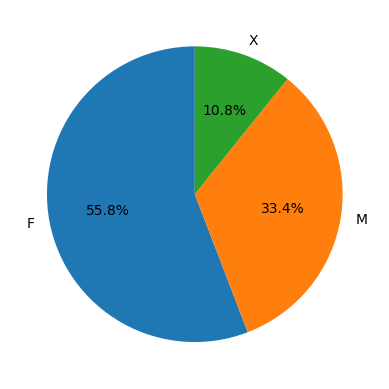

In [8]:
plt.pie(x=Crime_gen_counts.values, labels=Crime_gen_counts.index, autopct='%1.1f%%', startangle=90)

([<matplotlib.patches.Wedge at 0x7c583b8b9570>,
 [Text(-0.5592617241648739, 0.9472203143324855, 'Knife'),
  Text(-1.0997440761501969, -0.023726925054676412, 'Explosives'),
  Text(-0.5265600565165152, -0.9657818112189339, 'Blunt Object'),
  Text(0.5738265823466056, -0.9384684615864374, 'Poison'),
  Text(1.0997714925411262, 0.022420173814315027, 'Other'),
  Text(0.5425528630062326, 0.9568889124886651, 'Firearm')],
 [Text(-0.3050518495444766, 0.5166656259995376, '17.0%'),
  Text(-0.5998604051728346, -0.012941959120732587, '16.7%'),
  Text(-0.28721457628173547, -0.5267900788466912, '16.7%'),
  Text(0.31299631764360303, -0.5118918881380566, '16.7%'),
  Text(0.5998753595678868, 0.012229185716899104, '16.5%'),
  Text(0.29593792527612683, 0.5219394068119991, '16.4%')])

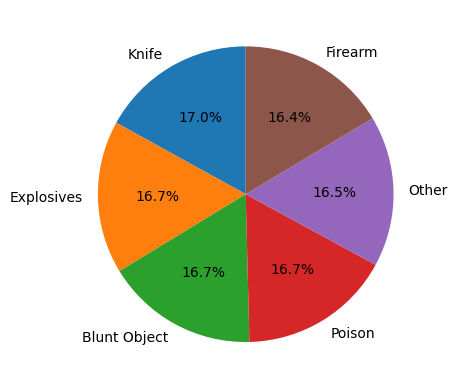

In [9]:
Weapon_counts = df['Weapon Used'].value_counts()
plt.pie(x=Weapon_counts.values, labels=Weapon_counts.index, autopct='%1.1f%%', startangle=90)

([<matplotlib.patches.Wedge at 0x7c583b91a6b0>,
 [Text(-1.0724316371581595, -0.24472511849475093, 'Other Crime'),
  Text(1.0723550329626361, -0.24506057063449377, 'Violent Crime'),
  Text(0.6200412790267099, 0.9085971672324991, 'Fire Accident'),
  Text(0.16416926547249971, 1.0876803079371347, 'Traffic Fatality')],
 [Text(-0.5849627111771779, -0.13348642826986412, '57.1%'),
  Text(0.5849209270705287, -0.1336694021642693, '28.6%'),
  Text(0.338204334014569, 0.4955984548540903, '9.5%'),
  Text(0.08954687207590892, 0.5932801679657097, '4.8%')])

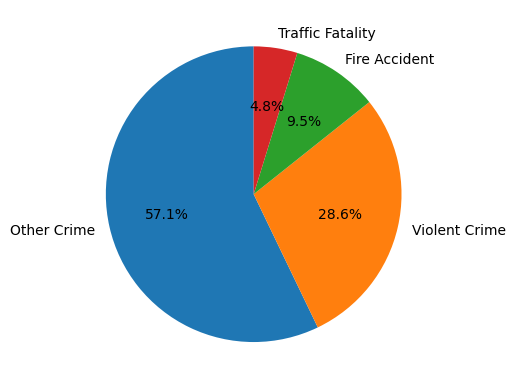

In [10]:
Domain_counts = df['Crime Domain'].value_counts()
plt.pie(x=Domain_counts.values, labels=Domain_counts.index, autopct='%1.1f%%', startangle=90)

([<matplotlib.patches.Wedge at 0x7c583b776530>,
 [Text(-1.0999989094181832, -0.0015489605571176982, 'No'),
  Text(1.0999989092731544, 0.001549063546447676, 'Yes')],
 [Text(-0.5999994051371909, -0.0008448875766096535, '50.0%'),
  Text(0.5999994050580841, 0.0008449437526078232, '50.0%')])

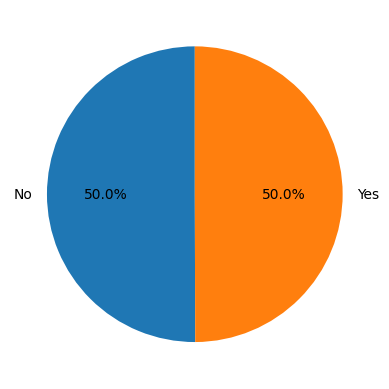

In [11]:
Close_counts = df['Case Closed'].value_counts()
plt.pie(x=Close_counts.values, labels=Close_counts.index, autopct='%1.1f%%', startangle=90)

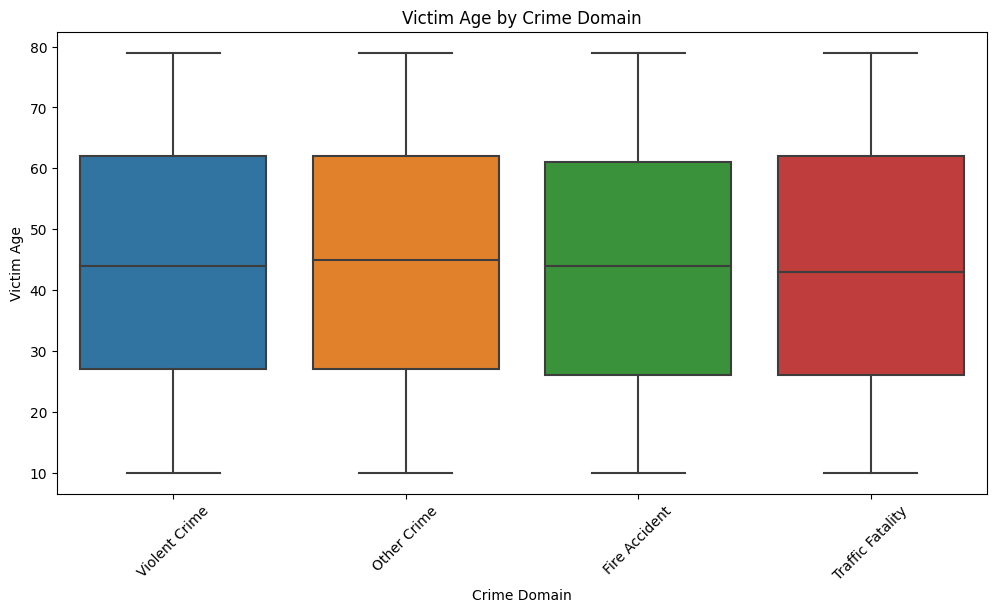

In [12]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Crime Domain', y='Victim Age')
plt.title('Victim Age by Crime Domain')
plt.xlabel('Crime Domain')
plt.ylabel('Victim Age')
plt.xticks(rotation=45)
plt.show()